<a href="https://colab.research.google.com/github/Pavith-web/Emotion_Detection_CNN/blob/main/Face_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('user uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

Saving archive (1).zip to archive (1).zip
user uploaded file "archive (1).zip" with length 63252113 bytes


In [ ]:
from zipfile import ZipFile
file_name = "archive (1).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir ='train'
val_dir ='test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode="categorical")

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode="categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))#to add convulution layer
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))#max pooling is used todownscale the image if not used
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))#it helps to prevent exponential growth
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))#softmax is used for multi class classification problem

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


448/448 [==============================] - 404s 898ms/step - loss: 1.8043 - accuracy: 0.2563 - val_loss: 1.7260 - val_accuracy: 0.3383
Epoch 2/10
448/448 [==============================] - 404s 902ms/step - loss: 1.6254 - accuracy: 0.3664 - val_loss: 1.5301 - val_accuracy: 0.4219
Epoch 3/10
448/448 [==============================] - 406s 907ms/step - loss: 1.5198 - accuracy: 0.4143 - val_loss: 1.4534 - val_accuracy: 0.4411
Epoch 4/10
448/448 [==============================] - 404s 903ms/step - loss: 1.4523 - accuracy: 0.4447 - val_loss: 1.3956 - val_accuracy: 0.4731
Epoch 5/10
448/448 [==============================] - 404s 901ms/step - loss: 1.3883 - accuracy: 0.4692 - val_loss: 1.3478 - val_accuracy: 0.4907
Epoch 6/10
448/448 [==============================] - 403s 899ms/step - loss: 1.3403 - accuracy: 0.4887 - val_loss: 1.3058 - val_accuracy: 0.5047
Epoch 7/10
448/448 [==============================] - 406s 906ms/step - loss: 1.2925 - accuracy: 0.5078 - val_loss: 1.2895 - val_accura

In [ ]:
#Saving the model
emotion_model.save('model.h5')

In [ ]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

OpenCV(4.1.2) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'



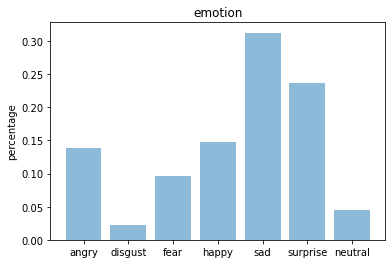

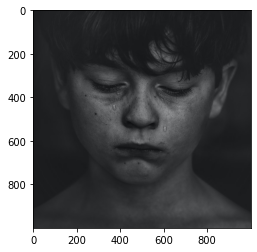

In [ ]:
import cv2
            
def facecrop(image):  
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    
    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('capture.jpg', sub_face)
            
    except Exception as e:
        print (e)

   


if __name__ == '__main__':
    facecrop('/content/pic3 (1).jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '/content/pic3 (1).jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()